In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats/test1.zip
/kaggle/input/dogs-vs-cats/train.zip
/kaggle/input/dogs-vs-cats/sampleSubmission.csv


In [11]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Conv2D, BatchNormalization, Dropout, Flatten
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from zipfile import ZipFile 
import os
from sklearn.model_selection import train_test_split
from PIL import Image
import cv2


In [12]:
file_train = "../input/dogs-vs-cats/train.zip"
file_test = "../input/dogs-vs-cats/test1.zip"

with ZipFile(file_train, 'r') as zip:
    zip.extractall('/train')
    print('Train Extract Done!') 
    
with ZipFile(file_test,'r') as zip:
    zip.extractall('/test1')
    print('Test Extract Done!')

Train Extract Done!
Test Extract Done!


In [13]:
print('Train Data ',len(os.listdir('/train/train/')))
print('Test Data ',len(os.listdir('/test1/test1/')))

Train Data  25000
Test Data  12500


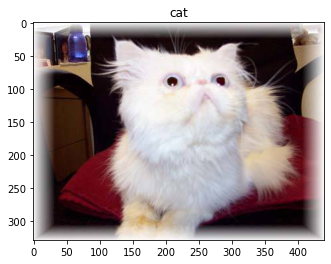

In [15]:
random_pic= np.random.randint(0, len(os.listdir('/train/train/')))
pic= os.listdir('/train/train/')[random_pic]

load= Image.open('/train/train/' + pic)
category= pic.split('.')[0]
plt.title(category)
img_plot=plt.imshow(load)

In [19]:
train_path='/train/train/'

X_train=[]
y_train =[]
convert = lambda category: int(category=='dog')

def create_train_data(path):
    for p in os.listdir(path):
        category= p.split(".")[0]
        category = convert(category)
        img_array= cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array=cv2.resize(img_array,dsize=(80,80))
        X_train.append(new_img_array)
        y_train.append(category)
create_train_data(train_path)

X_train= np.array(X_train).reshape(-1,80,80,1)
y_train= np.array(y_train)
X_train= X_train/255.0


In [22]:
test_path='/test1/test1/'

X_test=[]
test_id=[]

def create_test_data(path):
    for p in os.listdir(path):
        test_id.append(p.split('.')[0])
        img_array= cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80,80))
        X_test.append(new_img_array)
        
create_test_data(test_path)

X_test=np.array(X_test).reshape(-1,80,80,1)
X_test=X_test/255

In [23]:
model= Sequential()

model.add(Conv2D(16,(3,3),activation="relu", input_shape= X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3), activation="relu"))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), activation= "relu"))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation= "relu"))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())


model.add(Dense(512, activation="relu"))
model.add(Dense(1,activation ="sigmoid"))

In [24]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])


In [25]:
history=model.fit(X_train, y_train, epochs=20,batch_size =100, validation_split=0.3)

Epoch 1/20
175/175 [==============================] - 49s 277ms/step - loss: 0.6725 - accuracy: 0.5678 - val_loss: 0.5492 - val_accuracy: 0.7225
Epoch 2/20
175/175 [==============================] - 49s 281ms/step - loss: 0.5704 - accuracy: 0.7068 - val_loss: 0.5078 - val_accuracy: 0.7508
Epoch 3/20
175/175 [==============================] - 48s 276ms/step - loss: 0.4890 - accuracy: 0.7655 - val_loss: 0.4622 - val_accuracy: 0.7789
Epoch 4/20
175/175 [==============================] - 48s 277ms/step - loss: 0.4259 - accuracy: 0.8000 - val_loss: 0.3957 - val_accuracy: 0.8224
Epoch 5/20
175/175 [==============================] - 49s 281ms/step - loss: 0.3984 - accuracy: 0.8165 - val_loss: 0.3903 - val_accuracy: 0.8240
Epoch 6/20
175/175 [==============================] - 49s 280ms/step - loss: 0.3555 - accuracy: 0.8400 - val_loss: 0.3614 - val_accuracy: 0.8403
Epoch 7/20
175/175 [==============================] - 50s 285ms/step - loss: 0.3122 - accuracy: 0.8646 - val_loss: 0.3584 - val_ac

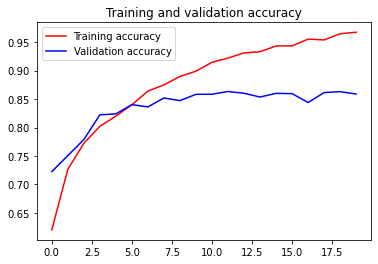

<Figure size 432x288 with 0 Axes>

In [26]:
acc= history.history['accuracy']
val_acc= history.history['val_accuracy']
epochs=range(len(acc))

plt.plot(epochs, acc, 'r', label="Training accuracy")
plt.plot(epochs, val_acc, 'b',label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend(loc=0)
plt.figure()
plt.show()

In [27]:
predictions= model.predict(X_test)
predicted_val=[int(round(p[0])) for p in predictions]


In [29]:
submission_df=pd.DataFrame({'id':test_id,'label':predicted_val})
submission_df.to_csv("submission.csv", index=False)

ValueError: num must be 1 <= num <= 25, not 26

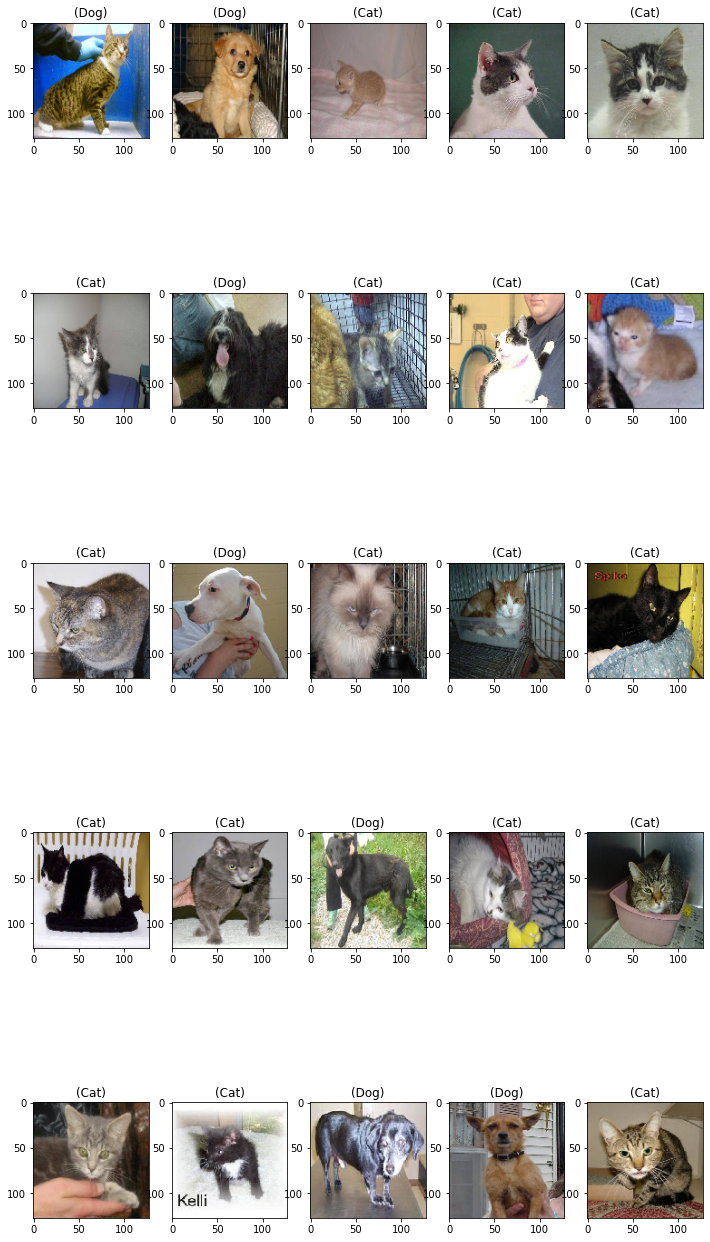

In [34]:
sample_test= submission_df.head(60)
plt.figure(figsize=(12,24))
for index,rows in sample_test.iterrows():
    filename= rows['id']
    category= rows['label']
    img= load_img("/test1/test1/" +filename+".jpg",target_size=(128,128))
    plt.subplot(10,6, index+1)
    plt.imshow(img)
    if(category==1):
        plt.title('('+"Dog"+')')
    else:
        plt.title('('+ "Cat" + ')')
plt.tight_layout()
plt.show()
    